# Multiple Linear Regression

### Created by Ramses Alexander Coraspe Valdez
### Created on September 15, 2019

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

## A. Application of Improved Multiple Linear Regression Method in Oilfield Output Forecasting.
Liang Guo, Xianghui Deng. 2009 IEEE, DOI: 10.1109/ICIII.2009.39. pp 133-136.
https://ieeexplore.ieee.org/document/5370533
This paper uses a multiple linear regression model to predict production of an oil field, the coefficients of the linear regression model are calculated using matrix operations which they call Model A, and some coefficients of the general model are discarded and now called Model B. The last model B has more predictive power because it has a lower average percentage of error.


## B. When we want to implement an algorithm or methodology published in an article, the first thing to do is repeat the ideas proposed by the authors with the same data they used to ensure that we are understanding and implementing it correctly. In this exercise we will repeat what was done by the authors of this article in order to validate and better understand what they did. That is, using the data they indicate, you must obtain the same equation (10) of multiple linear regression that they indicate on page 135. As there are really few data, the authors obtain the coefficients of the regression model using the pseudoinverse matrix, as It is explained in the article. In the article, the authors say that this equation was obtained with data from the years from 1983 to 2001, when they actually used data from 1980 to 2001, and erroneously did not publish the missing years in the table on page 135. That is, you must apply the multiple linear regression method with the data from the years 1980 to 2001 and obtain the regression equation shown on page 135. Note that for this section you should only use the data from 1980 to 2001, because they are those they use as training data.

In [2]:
df1 = pd.read_csv('https://raw.githubusercontent.com/Wittline/Machine_Learning/master/Multiple%20linear%20regression/data.csv',
                  sep=',', 
                  names=["year", "x1", "x2", "x3", 'x4', 'x5', 'x6', 'x7', 'x8', 'y']);
df1

,year,x1,x2,x3,x4,x5,x6,x7,x8,y
0,1980,379,309,136,119.18,35.60,1.87,7.05,126.39,136.75
1,1981,455,403,157,161.83,38.40,1.68,8.49,136.75,139.63
2,1982,569,495,207,184.56,39.40,1.77,9.61,139.63,142.19
3,1983,689,612,311,237.59,41.80,1.45,9.07,142.19,144.28
4,1984,855,720,351,230.50,42.33,1.53,9.54,144.28,141.72
5,1985,1028,874,426,276.59,42.93,1.60,9.49,141.72,146.61
6,1986,1268,1087,472,330.64,46.21,1.55,10.25,146.61,145.45
7,1987,1446,1197,652,398.14,45.80,1.49,9.35,145.45,148.94
8,1988,1705,1417,486,455.10,47.80,1.43,9.08,148.94,155.92
9,1989,1892,1524,458,526.91,49.30,1.31,9.31,155.92,165.23


In [0]:
x= df1[df1['year']<2002]
x= x.filter(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8'])
x.insert(0, 'x0', 1)

y= df1[df1['year']<2002]
y= y.filter(["y"])

In [4]:
x

,x0,x1,x2,x3,x4,x5,x6,x7,x8
0,1,379,309,136,119.18,35.60,1.87,7.05,126.39
1,1,455,403,157,161.83,38.40,1.68,8.49,136.75
2,1,569,495,207,184.56,39.40,1.77,9.61,139.63
3,1,689,612,311,237.59,41.80,1.45,9.07,142.19
4,1,855,720,351,230.50,42.33,1.53,9.54,144.28
5,1,1028,874,426,276.59,42.93,1.60,9.49,141.72
6,1,1268,1087,472,330.64,46.21,1.55,10.25,146.61
7,1,1446,1197,652,398.14,45.80,1.49,9.35,145.45
8,1,1705,1417,486,455.10,47.80,1.43,9.08,148.94
9,1,1892,1524,458,526.91,49.30,1.31,9.31,155.92


In [5]:
y

,y
0,136.75
1,139.63
2,142.19
3,144.28
4,141.72
5,146.61
6,145.45
7,148.94
8,155.92
9,165.23


In [0]:
x_t = x.transpose()
x_t_x= x_t.dot(x)
x_t_y= x_t.dot(y)
x_t_x_inv = pd.DataFrame(np.linalg.pinv(x_t_x.values), x_t_x.columns, x_t_x.index)
x_t_x_inv_x_t = x_t_x_inv.dot(x_t)

![texto alternativo](https://raw.githubusercontent.com/Wittline/Machine_Learning/master/Multiple%20linear%20regression/betas.png)

In [0]:
betas= x_t_x_inv.dot(x_t_y) 

In [8]:
betas

,y
x0,-62.324989
x1,-0.068315
x2,0.058864
x3,0.005765
x4,0.207588
x5,-1.060278
x6,58.204692
x7,0.567346
x8,0.810337


## C. Indicate the dimensions of each of the following matrices, in the case of training data from 1980 to 2001:

![texto alternativo](https://raw.githubusercontent.com/Wittline/Machine_Learning/master/Multiple%20linear%20regression/dim1.png)

![texto alternativo](https://raw.githubusercontent.com/Wittline/Machine_Learning/master/Multiple%20linear%20regression/dim2.png)

## D. Calculate the value of the matrix determinant ![texto alternativo](https://raw.githubusercontent.com/Wittline/Machine_Learning/master/Multiple%20linear%20regression/x_t_x.PNG) and the product ![texto alternativo](https://raw.githubusercontent.com/Wittline/Machine_Learning/master/Multiple%20linear%20regression/x_t_x_inv_x_t_x.PNG) According to these two results, what can you say about the convenience of using the pseudo-inverse method to obtain the solution of this linear least squares regression problem? Do you consider it reliable? Explain your conclusions.

The determinant of matrix ![texto alternativo](https://raw.githubusercontent.com/Wittline/Machine_Learning/master/Multiple%20linear%20regression/x_t_x.PNG) is different of null, For this reason using the pseudo-inverse is reliable, since there are no several solutions to the problem

In [9]:
det_x_t_x = np.linalg.det(x_t_x)
det_x_t_x

2.8321606086648074e+29

In [10]:
x_t_x_inv_x_t_x = x_t_x_inv.dot(x_t_x)
x_t_x_inv_x_t_x

,x0,x1,x2,x3,x4,x5,x6,x7,x8
x0,1.000000e+00,6.329217e-06,1.091395e-05,1.416689e-06,2.898735e-06,2.368228e-07,3.763736e-09,6.974065e-08,1.338657e-06
x1,8.975866e-16,1.000000e+00,4.979584e-13,3.950305e-13,5.025852e-13,1.513054e-14,3.379309e-16,5.708074e-16,6.250525e-14
x2,-7.270016e-14,4.729519e-10,1.000000e+00,1.063339e-10,2.194168e-10,1.808035e-11,2.866585e-13,5.347478e-12,1.023070e-10
x3,-3.407358e-14,2.491035e-10,4.283037e-10,1.000000e+00,1.138942e-10,9.293581e-12,1.478026e-13,2.735628e-12,5.252907e-11
x4,-1.355411e-13,8.006111e-10,1.444332e-09,1.807961e-10,1.000000e+00,3.126633e-11,4.942762e-13,9.290011e-12,1.771083e-10
x5,1.678772e-11,-1.158699e-07,-2.016905e-07,-2.598961e-08,-5.334007e-08,1.000000e+00,-6.944569e-11,-1.290486e-09,-2.473396e-08
x6,1.837902e-10,-1.446702e-06,-2.452717e-06,-3.230980e-07,-6.563693e-07,-5.325781e-08,1.000000e+00,-1.562912e-08,-3.007450e-07
x7,-6.614648e-12,4.786600e-08,8.252526e-08,1.072174e-08,2.192158e-08,1.791030e-09,2.848029e-11,1.000000e+00,1.012472e-08
x8,2.673417e-13,-1.526587e-09,-2.776233e-09,-3.452669e-10,-7.206609e-10,-6.006218e-11,-9.490186e-13,-1.787548e-11,1.000000e+00


## E. Get the 8 Pearson correlation coefficients of the variable 𝑌 with respect to each of the 8 independent variables Xi. Use only training data, using only data from 1980 to 2001.

![texto alternativo](https://raw.githubusercontent.com/Wittline/Machine_Learning/master/Linear%20Regression/pearson.png)



In [0]:
#Least square method, this will return the Variance and covariance of X and Y (X,Y)= (PetalLength, PetalWidth)
def Least_square(x,y):
  mx = x.mean()
  my = y.mean()
  u=0
  d=0
  e=0
  i=0;
  while(i< len(x)):
      u += ((x[i] - mx)*(y[i] - my))
      d += ((x[i] - mx)**2)
      e += ((y[i] - my)**2)
      i +=1;
    
  return (u/math.sqrt((d*e))), u, d, e

In [19]:
p1 = Least_square(x.x1, y.y)
p2 = Least_square(x.x2, y.y)
p3 = Least_square(x.x3, y.y)
p4 = Least_square(x.x4, y.y)
p5 = Least_square(x.x5, y.y)
p6 = Least_square(x.x6, y.y)
p7 = Least_square(x.x7, y.y)
p8 = Least_square(x.x8, y.y)
print("P1: ", p1[0], "P2: ", p2[0], "P3: ", p3[0], "P4: ", p4[0],"P5: ", p5[0],"P6: ", p6[0],"P7: ", p7[0], "P8: ", p8[0])

P1:  0.984700926728884 P2:  0.9642826572078953 P3:  0.8225956535246249 P4:  0.9893854106062562 P5:  0.9582358430790742 P6:  -0.895757193200154 P7:  0.9797920498092796 P8:  0.9942855794141416


## F. Get the 8 scatter plots of each of the independent variables 𝑋i, with respect to the variable 𝑌.
All the variables are highly correlated with the variable Y, The which one shows a negative correlation coincides with the negative slope that in this case is the variable X6 that also has a negative correlation coefficient, the variable that showed less correlation was the variable X3.

<Figure size 1080x720 with 0 Axes>

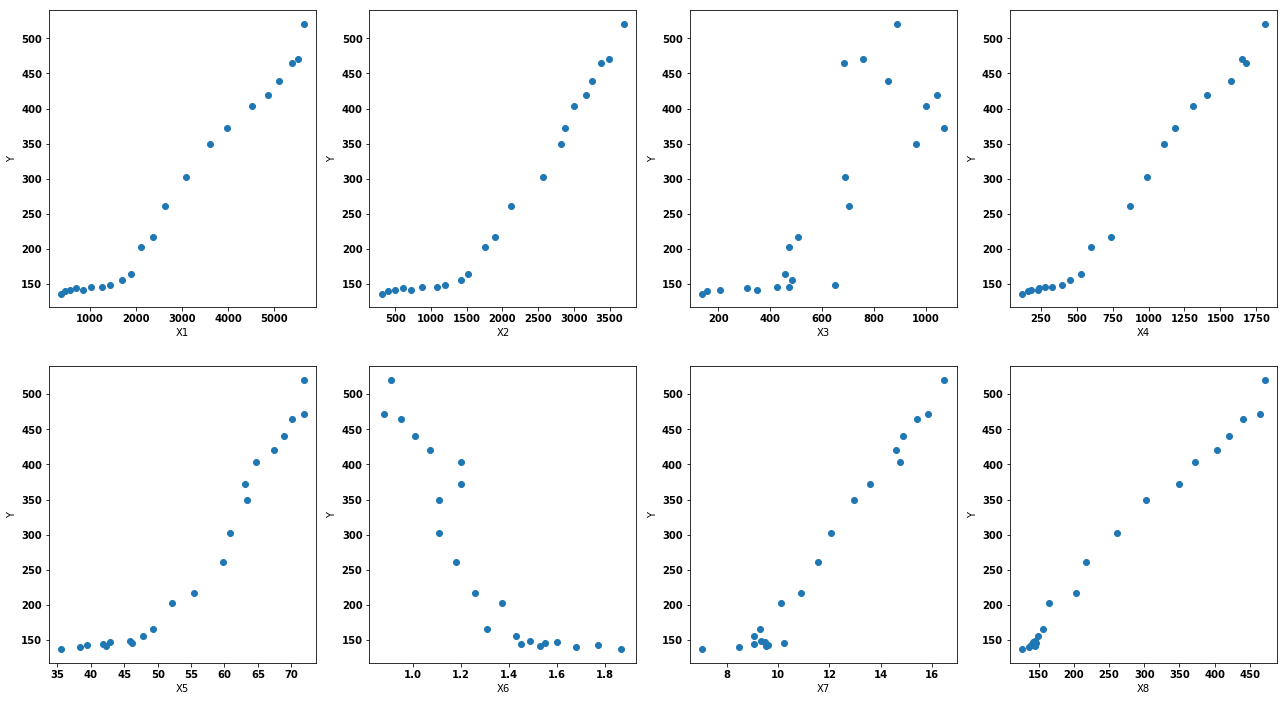

In [62]:
fig = plt.figure()

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(22, 12))
plt.subplots_adjust(wspace=0.2, hspace=0.2)

axes[0, 0].scatter(x.x1, y.y, color='C0')
axes[0, 0].set_xlabel("X1")
axes[0, 0].set_ylabel("Y")

axes[0, 1].scatter(x.x2, y.y, color='C0')
axes[0, 1].set_xlabel("X2")
axes[0, 1].set_ylabel("Y")


axes[0, 2].scatter(x.x3, y.y, color='C0')
axes[0, 2].set_xlabel("X3")
axes[0, 2].set_ylabel("Y")

axes[0, 3].scatter(x.x4, y.y, color='C0')
axes[0, 3].set_xlabel("X4")
axes[0, 3].set_ylabel("Y")


axes[1, 0].scatter(x.x5, y.y, color='C0')
axes[1, 0].set_xlabel("X5")
axes[1, 0].set_ylabel("Y")


axes[1, 1].scatter(x.x6, y.y, color='C0')
axes[1, 1].set_xlabel("X6")
axes[1, 1].set_ylabel("Y")

axes[1, 2].scatter(x.x7, y.y, color='C0')
axes[1, 2].set_xlabel("X7")
axes[1, 2].set_ylabel("Y")

axes[1, 3].scatter(x.x8, y.y, color='C0')
axes[1, 3].set_xlabel("X8")
axes[1, 3].set_ylabel("Y")

plt.show()


## G. The authors explain on pages 135 and 136 of the article a method (screening process) to discard some variables that they do not consider relevant for the linear model found, where at the end of this process they remain only with the variables they consider more important, in This case were 𝑋1, 𝑋2, 𝑋4, 𝑋8. Assuming that as an alternative method you would have used the criterion of leaving only the variables 𝑋i that have a Pearson correlation coefficient with the variable 𝑌, greater than 0.96, what variables would have remained in your model?

# X1, X4, X7, X8



## H. Use the linear regression equation (10), called Model A in the article (the one that uses the 8 independent variables), to validate this model with the Test Data used by the authors, that is, using only the data of the years 2002 to 2006. Also calculate the relative percent errors of these results. Compare these results that you obtained with the results obtained by the authors and shown in Table III on page 136. Which year or years show a considerable discrepancy between your results and those of the article? NOTE: The percentage relative error is calculated by the authors using the following operation:![texto alternativo](https://raw.githubusercontent.com/Wittline/Machine_Learning/master/Multiple%20linear%20regression/pe.png)

## I. Repeat the previous experiment with the so-called Model B, that is, using equation 11 on page 136 of the article. Again compare your results with those shown by the authors.


In both cases Partially similar results are being obtained, the prediction for the year 2006 is different from  the author, it is higher, therefore the percentage of error is higher.

In [91]:
def ModelA(x1,x2,x3,x4,x5,x6,x7,x8):
  return (-63.325 - (0.0683*x1) + (0.0589*x2) + (0.0058*x3) + (0.2076*x4) - (1.0603*x5) + (58.2047*x6) + (0.5673*x7) + (0.8103*x8))

def ModelB(x1,x2,x3,x4,x5,x6,x7,x8):
  return (-63.325 - (0.0683*x1) + (0.0589*x2) + (0.2076*x4) + (0.8103*x8))

def evaluate(d):
    mA = [None] * len(d)
    mB = [None] * len(d)
    eA = [None] * len(d)
    eB = [None] * len(d)
    vy = [None] * len(d)
    year = [None] * len(d)

    for i in range(len(d)):    
      mA[i]= ModelA(d.iloc[i]['x1'], d.iloc[i]['x2'],d.iloc[i]['x3'],d.iloc[i]['x4'],d.iloc[i]['x5'],d.iloc[i]['x6'],d.iloc[i]['x7'],d.iloc[i]['x8']);
      mB[i]= ModelB(d.iloc[i]['x1'], d.iloc[i]['x2'],d.iloc[i]['x3'],d.iloc[i]['x4'],d.iloc[i]['x5'],d.iloc[i]['x6'],d.iloc[i]['x7'],d.iloc[i]['x8']);
      vy[i] = d.iloc[i]['y'] 
      eA[i] = 100*((mA[i] - d.iloc[i]['y'])/mA[i])
      eB[i] = 100*((mB[i] - d.iloc[i]['y'])/mB[i])
      year[i] =  d.iloc[i]['year'] 

    return year, vy, mA, eA, mB, eB 

data = df1[df1['year']>=2002]
year, vy, mA, eA, mB, eB = evaluate(data)
results = pd.DataFrame(list(zip(year, vy, mA, eA, mB, eB)), 
               columns =['Year', 'Output', 'Modelo A', 'Error', 'Modelo B', 'Error']) 
results

,Year,Output,Modelo A,Error,Modelo B,Error
0,2002.0,611.55,595.277920,-2.733527,608.498598,-0.501464
1,2003.0,715.87,693.577599,-3.214118,705.575645,-1.459001
2,2004.0,810.95,849.162143,4.499982,856.301361,5.296192
3,2005.0,905.10,965.194674,6.226171,971.735375,6.857358
4,2006.0,962.30,1163.334112,17.280858,1167.160250,17.552024


## J. What conclusions can you get from this Task and the process of repeating the tests of an article and trying to obtain the same results as the authors?
People trust the results of a scientific researching and almost never repeat the author's experiments, in this case I found discrepancies in the values that were predicted for the year 2006, which dramatically changed the expected error, and therefore also the error average, where both models have almost the same average percentage of error in their predictions.

## K. What are your thoughts about this article published with missing data and results with clear discrepancies?
It is difficult to trust results where it is not clear how they used the dataset, sometimes the authors do not dedicate a paragraph to explain the origin and the real status of their dataset and that will always generate discrepancies in the experiments.